# A Different Data Source
Due to some limitations/bugs in the current version of MetPy, the best way to deal with real-time GFS forecasts is to access data from a THREDDS server. I have provided a function in the `synoptic` module to take care of this. Let's plot 500-mb heights using a current GFS forecast on a 1 degree global lat/lon grid. (This corresponds to the gfs003 set of GEMPAK files on cat5.)

## Imports

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import get_gfs1deg

from datetime import datetime, timedelta

from metpy.units import units
from metpy.plots import ContourPlot, MapPanel, PanelContainer

import matplotlib.pyplot as plt

## Get the Data

In [2]:
curtime = datetime.utcnow()

In [3]:
#init_time = datetime(2024, 9, 18, 6)
init_time = curtime.replace(hour=6, minute=0, second=0, microsecond=0)
plot_time = init_time + timedelta(hours=48)
gfs = get_gfs1deg(init_time, plot_time)

In [4]:
ht500 = gfs['Geopotential_height_isobaric'].metpy.sel(vertical=500*units('hPa'))

## Make the plot
This is just a copy/paste from example 1, except the area is much larger (taking advantage of global data).  The only steps that changed were the imports and the process of getting the data we needed.

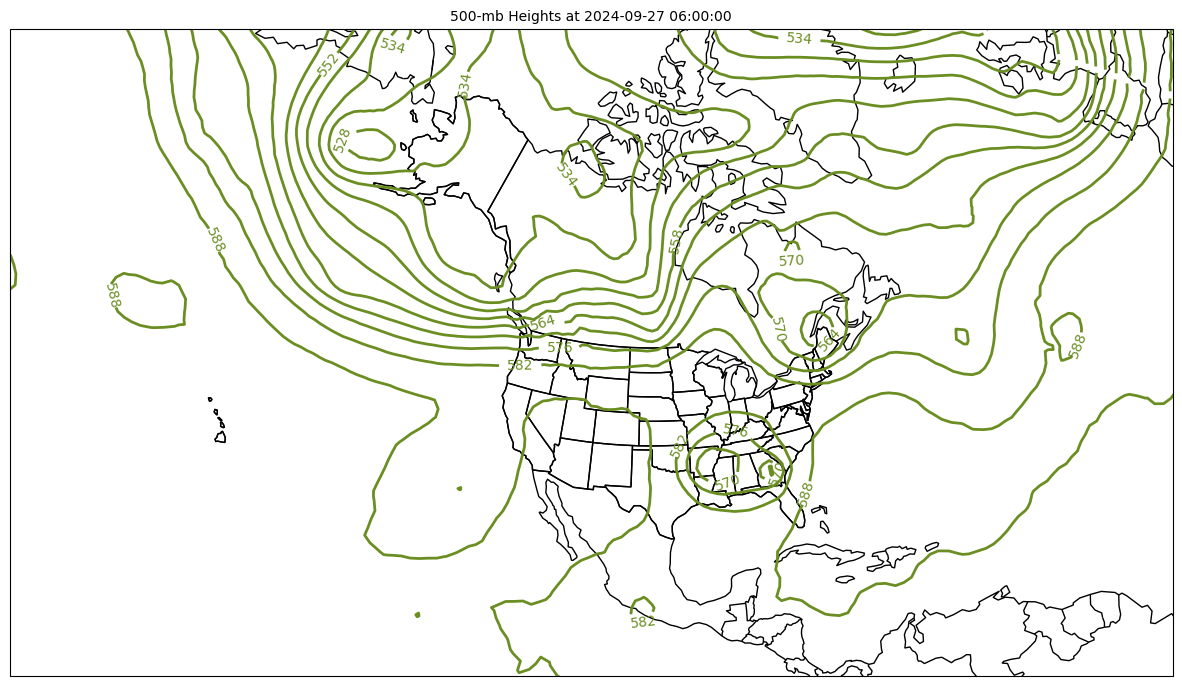

In [5]:
cp = ContourPlot()
cp.data = ht500
cp.time = plot_time
cp.contours = list(range(0, 700, 6))
cp.linecolor = 'olivedrab'
cp.linestyle = 'solid'
cp.clabels = True
cp.plot_units = 'dam'

panel = MapPanel()
panel.area = [-180, -40, 10, 75]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'500-mb Heights at {plot_time}'
panel.plots = [cp]

pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]
pc.show()

## Xarray can do calculations, too!

`mpcalc` provides a number of diagnostic functions specific to meteorological analysis, but sometimes, the calculation we may want to do is less specialized. In those cases, we can call upon Xarray functionality directly. Here, we use the `mean()` method which all `DataArray`s have access to.

In [6]:
zonal_mean = ht500.mean(dim='longitude', keep_attrs=True)

<function matplotlib.pyplot.show(close=None, block=None)>

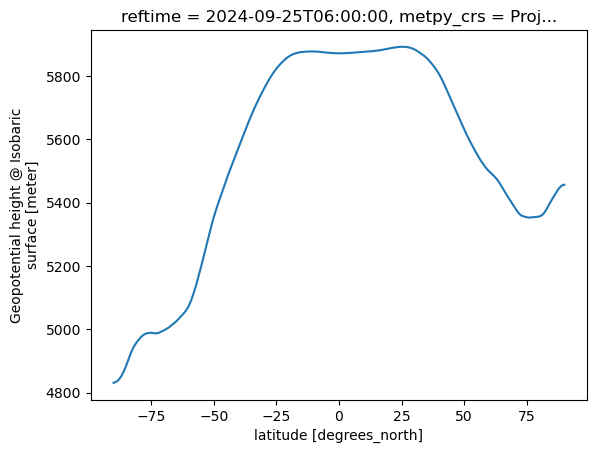

In [7]:
# There is no MetPy interface for a line plot, so we use xarray instead for a quick plot:
zonal_mean.plot()
plt.show